In [35]:
#Classification Using Perceptron

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20
digits = datasets.load_digits()
X, y = digits.data, digits.target

classifiers = [
    ("SGD", SGDClassifier(max_iter=100, tol=1e-3)),
    ("ASGD", SGDClassifier(average=True, max_iter=1000, tol=1e-3)),
    ("Perceptron", Perceptron(tol=1e-3)),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge', C=1.0, tol=1e-4)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge', C=1.0, tol=1e-4)),
    ("SAG", LogisticRegression(solver='sag',tol=1e-1,C=1.e4/X.shape[0], multi_class = 'auto'))
]

xx = 1. -np.array(heldout)

Training SGD
Training ASGD
Training Perceptron
Training Passive-Aggressive I
Training Passive-Aggressive II
Training SAG


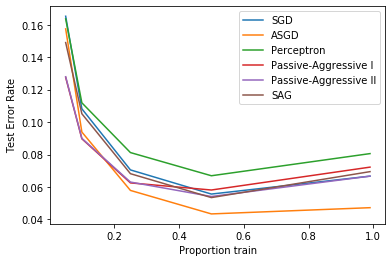

In [36]:
for name, clf in classifiers:
    print("Training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size = i, random_state = rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)    

plt.legend(loc = "upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()
            